## RANDOM FOREST REGRESSION on house_pricing dataset

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('../../datasets/house_pricing.csv')
df.head()

,City,Type,Beds,Baths,SquareFeet,Price
0,SACRAMENTO,Residential,2,1,836,138159.85
1,SACRAMENTO,Residential,3,1,1167,167541.46
2,SACRAMENTO,Residential,2,1,796,119095.12
3,SACRAMENTO,Residential,2,1,852,130904.95
4,SACRAMENTO,Residential,2,1,797,120266.19


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
x = df[['Beds','Baths','SquareFeet']]
y = df['Price']

In [6]:
feature_scaler = StandardScaler()
x = feature_scaler.fit_transform(x)

In [7]:
trainx,testx,trainy,testy = train_test_split(x,y, test_size=.2,random_state=0)

In [8]:
model = RandomForestRegressor(n_estimators=50,n_jobs=-1,random_state=0)
model.fit(trainx,trainy)
model.score(testx,testy)*100

82.83264707963762

In [9]:
model.score(x,y)*100

91.68367391021233

In [10]:
ypred = model.predict(x)

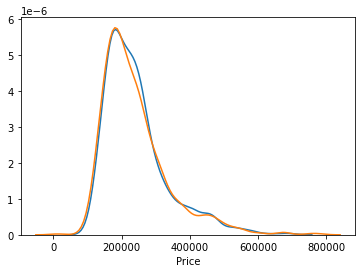

In [12]:
sns.distplot(ypred,hist=False)
sns.distplot(y,hist=False)
plt.show()

In [13]:
import pickle

In [18]:
def save_model(path,model):
    with open(path,'wb') as f:
        pickle.dump(model,f)
    return path 

def load_model(path):
    with open(path,'rb') as f:
        return pickle.load(f)   

In [16]:
save_model('../../models/rfr_house_price_model.pkl',model)

'../../models/rfr_house_price_model.pkl'

In [20]:
save_model('../../models/rfr_feature_scaler_house_price.pkl',feature_scaler)

'../../models/rfr_feature_scaler_house_price.pkl'